In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

1. Data Cleaning:

In [6]:
path = "/content/drive/MyDrive/STAT_495/Stocks.csv"
df = pd.read_csv(path)
df

,Name,Symbol,Sector,Price,Dividend,PE,EPS,52 week low,52 week high,Market Cap,EBITDA
0,3M Company,MMM,Industrials,189.09,2.48,23.17,8.16,158.28,190.54,112.74,8.7000
1,Abbott Laboratories,ABT,Health Care,45.00,2.34,48.03,0.94,36.76,45.83,77.76,4.5900
2,Accenture plc,ACN,Information Technology,124.14,1.96,18.37,6.76,102.10,125.72,77.29,5.6600
3,Activision Blizzard,ATVI,Information Technology,48.06,0.64,37.55,1.28,30.37,48.36,36.13,2.1400
4,Acuity Brands Inc,AYI,Industrials,205.41,0.25,29.68,6.92,193.06,280.89,9.00,0.5862
...,...,...,...,...,...,...,...,...,...,...,...
337,XL Capital,XL,Financials,40.13,2.18,25.72,1.56,30.33,41.39,10.63,1.1000
338,Xylem Inc.,XYL,Industrials,48.78,1.48,33.64,1.45,37.58,54.99,8.75,0.6150
339,Zimmer Biomet Holdings,ZBH,Health Care,117.07,0.81,77.53,1.51,95.63,133.21,23.54,2.8000
340,Zions Bancorp,ZION,Financials,45.28,0.71,22.75,1.99,23.02,48.33,9.17,0.0000


In [80]:
# a)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          342 non-null    object 
 1   Symbol        342 non-null    object 
 2   Sector        342 non-null    object 
 3   Price         341 non-null    float64
 4   Dividend      342 non-null    float64
 5   PE            341 non-null    float64
 6   EPS           341 non-null    float64
 7   52 week low   340 non-null    float64
 8   52 week high  341 non-null    float64
 9   Market Cap    342 non-null    float64
 10  EBITDA        342 non-null    float64
dtypes: float64(8), object(3)
memory usage: 29.5+ KB


In [81]:
# b)
df.isna().sum()

Name            0
Symbol          0
Sector          0
Price           1
Dividend        0
PE              1
EPS             1
52 week low     2
52 week high    1
Market Cap      0
EBITDA          0
dtype: int64

In [82]:
# c)
## Price
avePrice = df['Price'].mean()
## PE
avePE = df['PE'].mean()
## EPS
aveEPS = df['EPS'].mean()
## 52 week low
aveLow = df['52 week low'].mean()
## 52 week high
aveHigh = df['52 week high'].mean()
fill_values = {
    'Price': avePrice,
    'PE': avePE,
    'EPS': aveEPS,
    '52 week low': aveLow,
    '52 week high': aveHigh
}
new_df = df.fillna(fill_values)

In [83]:
# d)
for i in new_df.index:
  if new_df.loc[i,'EPS'] > 20:
    new_df.drop(i, inplace = True)

In [84]:
# e)
new_df['logPrice'] = np.log10(new_df['Price'])

In [85]:
# g)
new_df['Differences'] = new_df['52 week high'] - new_df['52 week low']

In [111]:
# h)
new_df['EBITDAbooleanValue'] = False
for i in new_df.index:
  if new_df.loc[i,'EBITDA'] > 1:
    new_df.loc[i, 'EBITDAbooleanValue'] = True
new_df['EBITDAbooleanValue'] = new_df['EBITDAbooleanValue'].astype(int)

In [112]:
# i)
new_df.loc[1,'Name'] = 'Huiting Wu'

In [113]:
output_path = "/content/drive/MyDrive/STAT_495/Cleaned_Stocks.csv"
new_df.to_csv(output_path, index = False)
print(f"DataFrame saved to {output_path}")

DataFrame saved to /content/drive/MyDrive/STAT_495/Cleaned_Stocks.csv


2. Data Inspection

In [114]:
cd = pd.read_csv(output_path)
cd.isna().sum() # there is no missing value.

Name                  0
Symbol                0
Sector                0
Price                 0
Dividend              0
PE                    0
EPS                   0
52 week low           0
52 week high          0
Market Cap            0
EBITDA                0
logPrice              0
Differences           0
EBITDAbooleanValue    0
dtype: int64

In [115]:
# a)
cd.groupby(by = 'Sector').size()

Sector
Consumer Discretionary        55
Consumer Staples              25
Energy                         6
Financials                    59
Health Care                   34
Industrials                   51
Information Technology        38
Materials                     20
Real Estate                   27
Telecommunication Services     3
Utilities                     23
dtype: int64

In [116]:
# b)
cd.groupby(by = 'Sector').Differences.aggregate('mean').sort_values(ascending=True)

Sector
Telecommunication Services     9.936667
Utilities                     11.761338
Consumer Staples              18.865200
Energy                        19.945000
Consumer Discretionary        21.274196
Information Technology        24.308947
Real Estate                   26.793333
Financials                    27.044976
Health Care                   29.963824
Materials                     30.874000
Industrials                   31.816667
Name: Differences, dtype: float64

In [17]:
# c)
cd.groupby(by = 'Sector').EPS.aggregate('std').sort_values(ascending=True)

Sector
Telecommunication Services    1.026174
Utilities                     1.433574
Energy                        1.593675
Consumer Staples              2.022614
Consumer Discretionary        2.129783
Information Technology        2.427637
Real Estate                   2.585953
Health Care                   2.800441
Materials                     2.826266
Industrials                   3.171595
Financials                    3.553237
Name: EPS, dtype: float64

In [39]:
# d)
cd.sort_values(by ='Dividend',ascending=False).head()[['Name', 'Dividend']]

,Name,Dividend
157,Iron Mountain Incorporated,6.05
192,Mattel Inc.,5.97
220,ONEOK,5.44
263,Seagate Technology,5.15
327,Welltower Inc.,5.00


In [40]:
# e)
cd.sort_values(by ='EPS',ascending=True).head()[['Name', 'EPS']]

,Name,EPS
167,Kinder Morgan,0.25
176,Leucadia National Corp.,0.34
198,Microchip Technology,0.41
157,Iron Mountain Incorporated,0.42
328,Western Union Co,0.51


In [52]:
# f)
for i in cd.index:
  if cd.loc[i, 'Dividend'] == 0:
    print(cd.loc[i, 'Name'])

E*Trade
Express Scripts
Lumen Technologies
Mylan N.V.
United Continental Holdings
Varian Medical Systems


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.


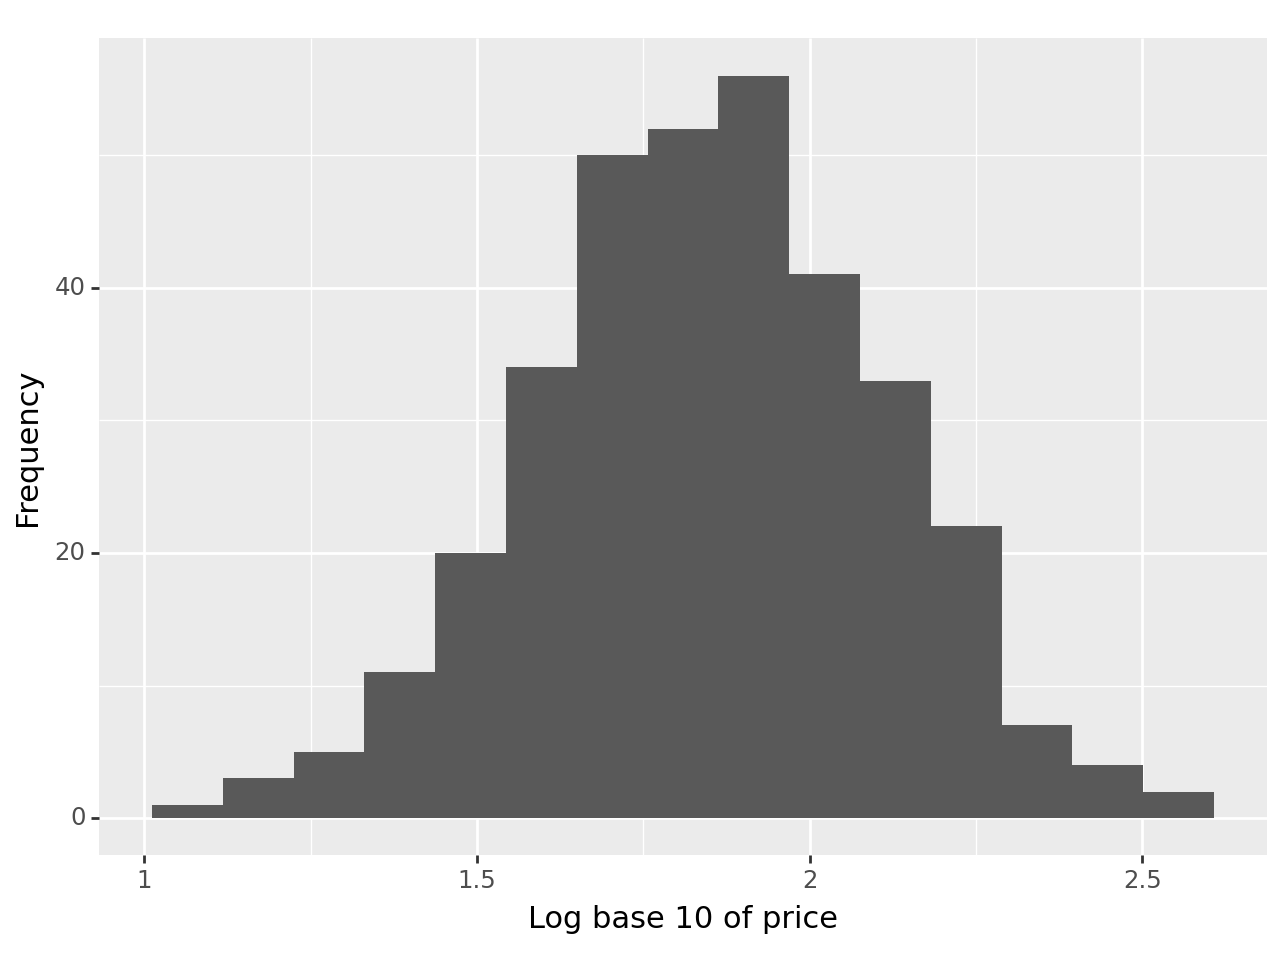

<Figure Size: (640 x 480)>

In [60]:
# g)
ggplot(cd) + aes(x = 'logPrice') + geom_histogram() + xlab('Log base 10 of price') + ylab('Frequency')

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 79'. Pick better value with 'binwidth'.


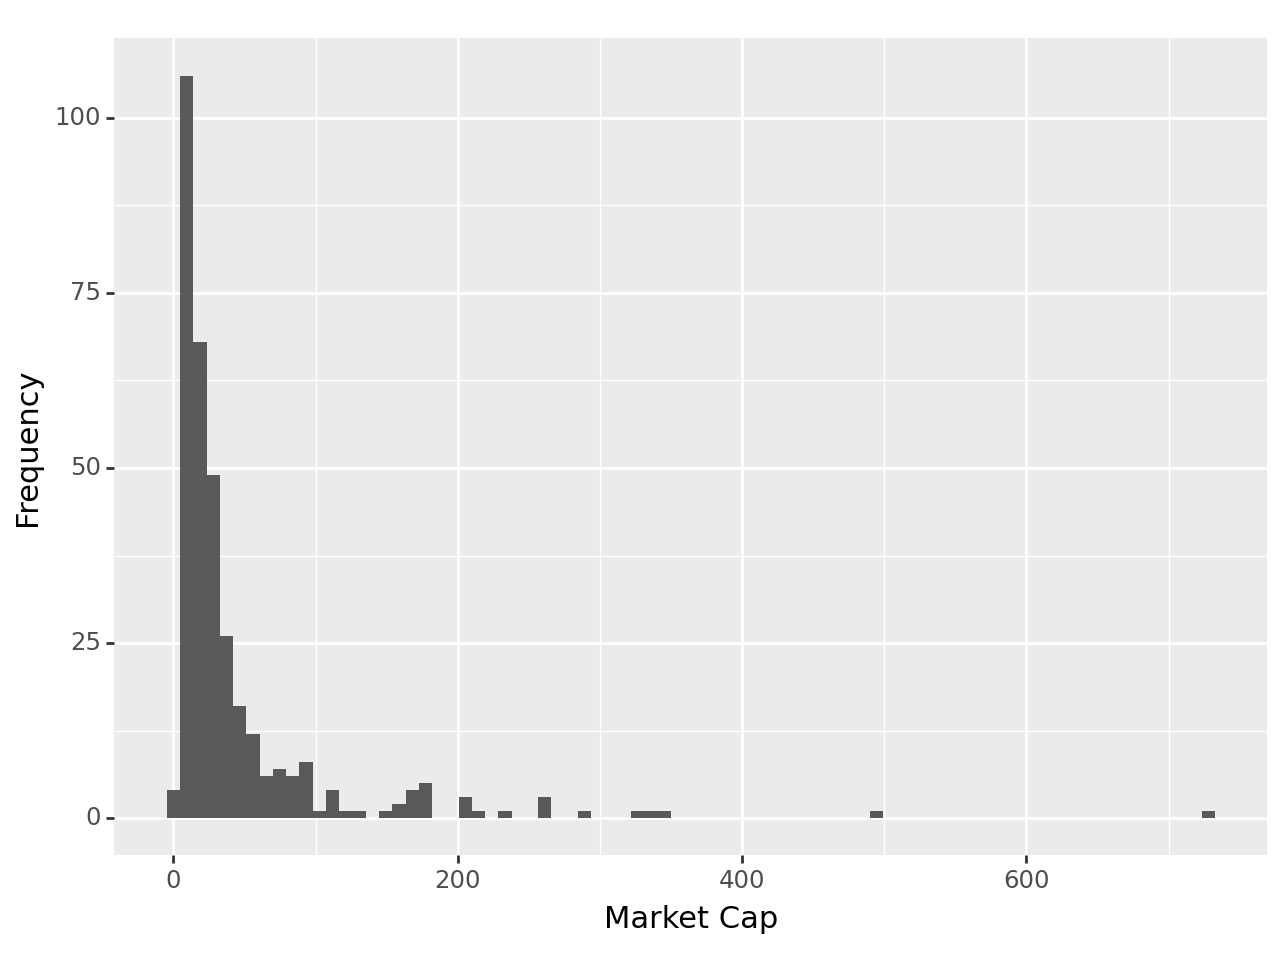

<Figure Size: (640 x 480)>

In [63]:
ggplot(cd) + aes(x = 'Market Cap')+ geom_histogram() + xlab('Market Cap') + ylab('Frequency')

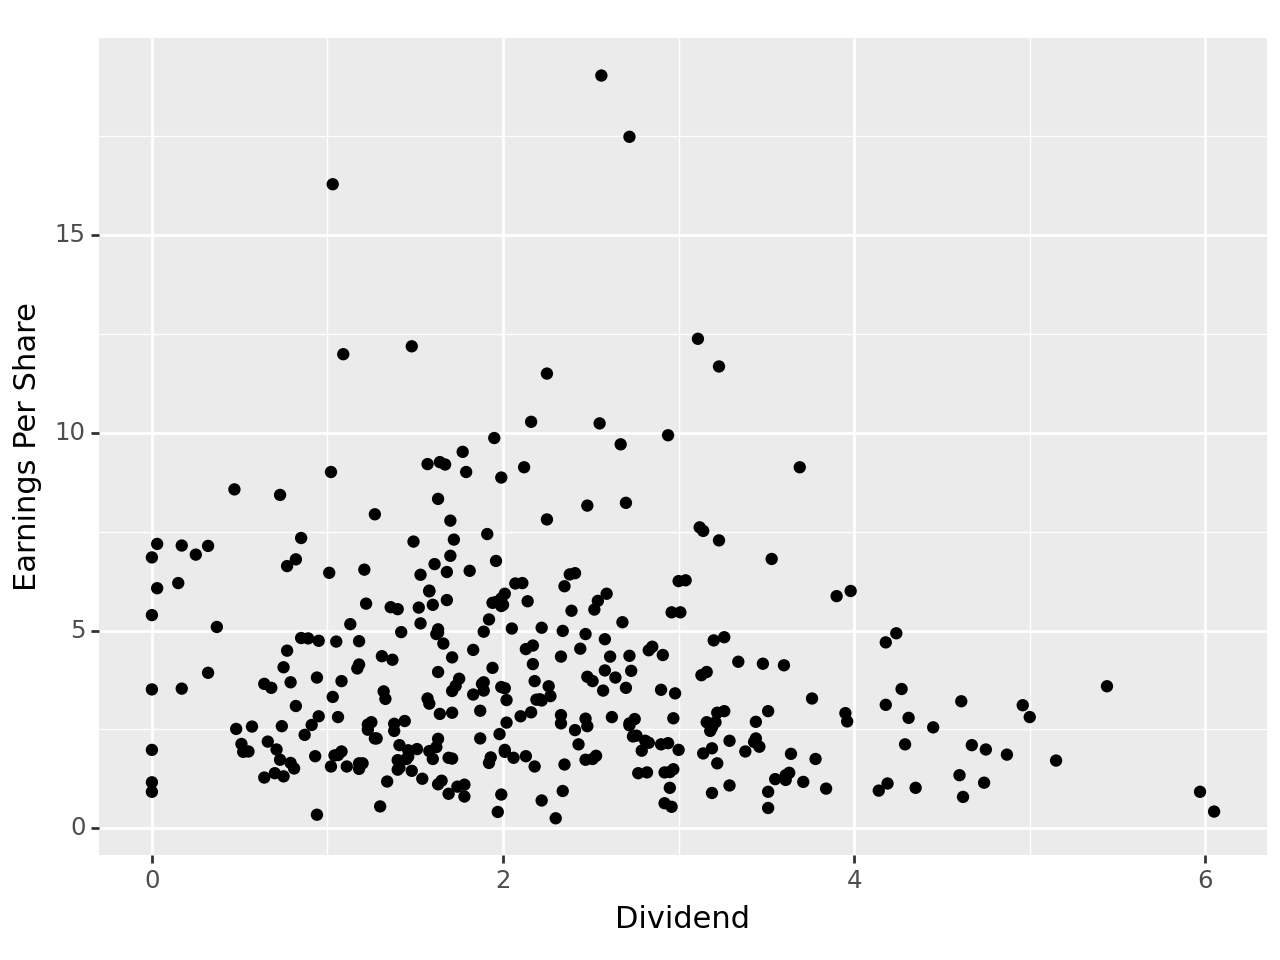

<Figure Size: (640 x 480)>

In [10]:
# h)
ggplot(cd) + aes(x = 'Dividend', y = 'EPS') + geom_point() + ylab('Earnings Per Share')

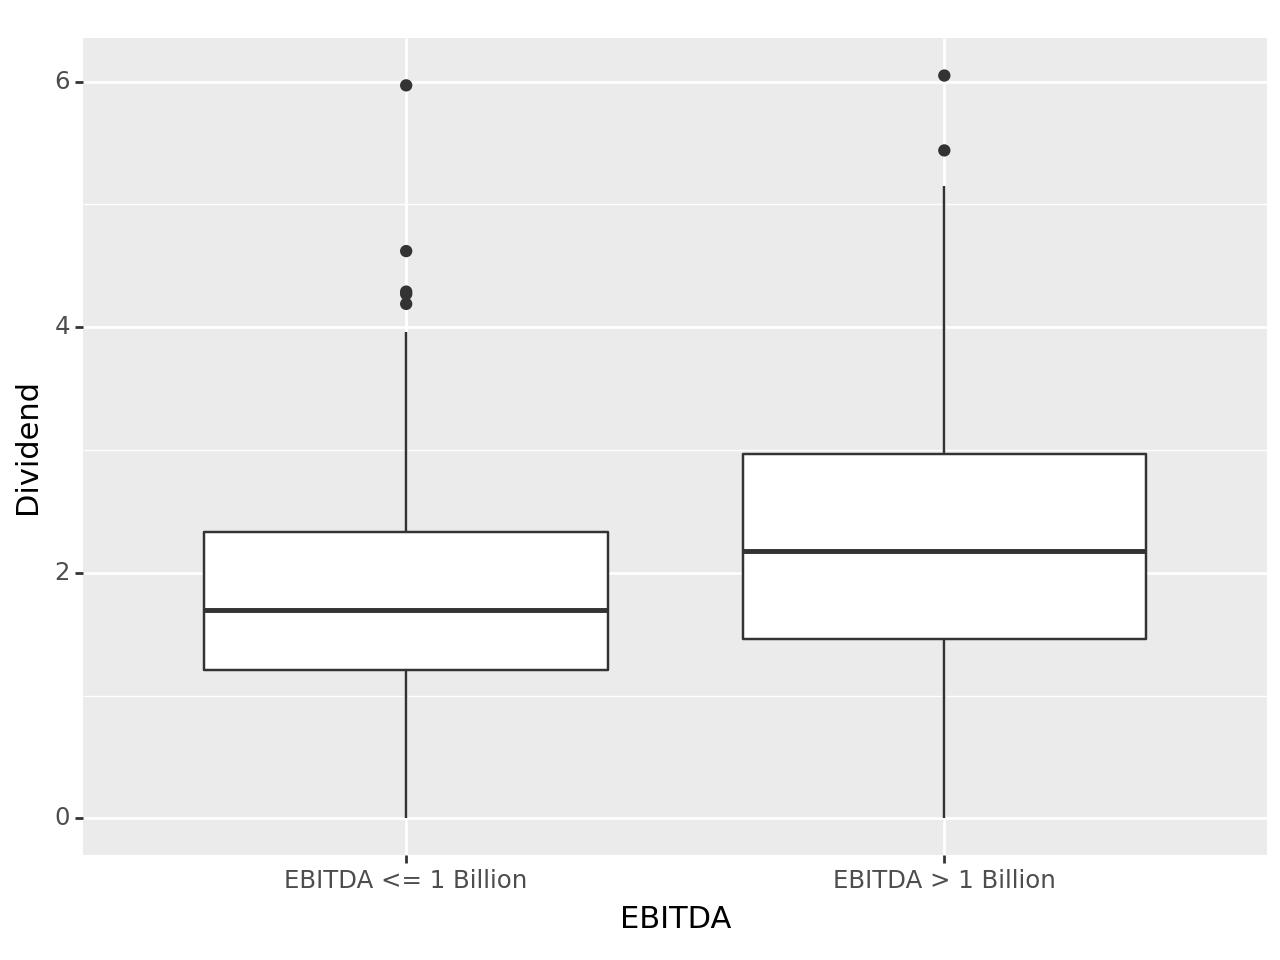

<Figure Size: (640 x 480)>

In [134]:
# i)
EBITDA = cd['EBITDAbooleanValue'].astype(bool)
Dividend = cd['Dividend']
boxplotData = pd.DataFrame({'EBITDAbooleanValue': EBITDA,
                            'Dividend': Dividend})
ggplot(boxplotData) + aes(x ='EBITDAbooleanValue' , y ='Dividend') + geom_boxplot() + scale_x_discrete(labels=['EBITDA <= 1 Billion','EBITDA > 1 Billion'])+ xlab('EBITDA')